In [131]:
import matplotlib.pyplot as plt 
import torchvision
import sys
import torch.nn as nn

sys.path.append("..")
import transformations as custom_transforms
import datasets as datasets


%load_ext autoreload
%autoreload 2
%matplotlib inline

# do not use transorms.ToTensor(),already implemented implicitly. 

L = datasets.SegmentationDatasetLabeled(
    dir_images="./my_dataset/images/",
    dir_masks="./my_dataset/masks/",
    
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
torch.Size([3, 3, 321, 481])
torch.Size([12, 3, 321, 481])


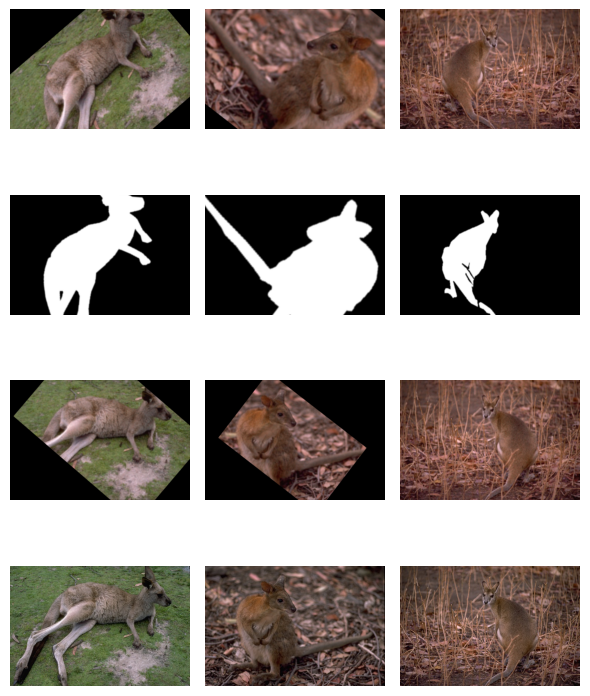

In [150]:
import kornia as K
import transformations as custom_transforms
import torch

%load_ext autoreload
%autoreload 2
%matplotlib inline

from utils import plot_batch

k1 = custom_transforms.GaussianNoiseChannelwise((0.1, 0.01, 0.01))
k2 = K.augmentation.RandomGaussianBlur((3,3),sigma=(5.,1.),p=0.75)
k3 = K.augmentation.RandomHorizontalFlip(p=0.75)
k4 = K.augmentation.RandomAffine([-45., 45.], [0., 0.15], [0.5, 1.5], [0., 0.15])

img_trans = nn.ModuleList([k1,k2,k3,k4])
mask_trans = nn.ModuleList([k2,k3,k4]) 
invert_trans  = nn.ModuleList([k3,k4])

segmentation_transform = custom_transforms.MyAugmentation(img_trans,mask_trans,invert_trans)

imgs = []
masks = []
for i in range(len(L)):
    img_, mask_ = L[i]
    imgs.append(img_.unsqueeze(0))
    masks.append(mask_.unsqueeze(0))

imgs = torch.cat(imgs,dim=0)
masks = torch.cat(masks,dim=0)
print(imgs.shape)
orig_imgs = imgs
orig_masks = masks
imgs,masks = segmentation_transform(imgs,masks)
retrived_imgs = segmentation_transform.inverse_last_transformation(imgs)
img_out = torch.cat([imgs, masks,retrived_imgs,orig_imgs], dim=0)
img_out = img_out.clip(0,1)
print(img_out.shape)
plot_batch(img_out,num_rows=4)

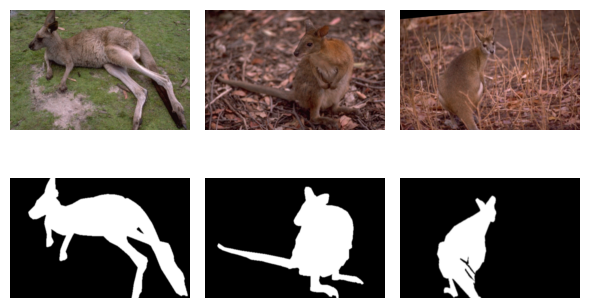

In [147]:
# Apply last transform in forward manner
imgs_,masks_ = segmentation_transform.apply_last_transformation(orig_imgs,orig_masks)
plot_batch(torch.cat([imgs_,masks_],dim=0).clip(0,1),num_rows=2)

torch.Size([6, 3, 321, 481])
torch.Size([6, 3, 321, 481])


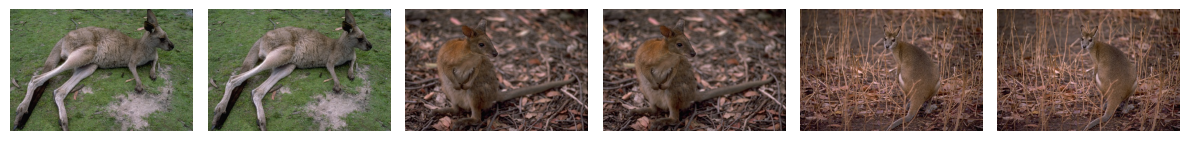

In [148]:
x_repeated = orig_imgs.repeat(1,2,1,1).reshape(2*orig_imgs.shape[0],*orig_imgs.shape[1:])
print(x_repeated.shape)
x_stacked = torch.cat([x_repeated[:, i:i+2, :, :] for i in range(0, orig_imgs.shape[1], 2)], dim=1)
print(x_stacked.shape)
plot_batch(x_stacked,num_rows=1)